# Kalorimetrie Laborversuch

Author: David Büning

Datum: 11.12.2023

Gruppe: 13

## Forschungsfrage

Wie lässt sich die Kalorimeterkonstante aus zugeführter Wärme und Temperaturdifferenz bestimmen? Wie kann man dann mit dieser und der Mischungstemperatur durch Einsetzen einer warmen Probe die spezifische Wärmekapazität dieser Probe berechnen?

## Versuchsaufbau und Durchführung

Für den Versuch haben wir zuerst ein Gefäß benötigt, in welchem wir unser Wasser gegeben haben. Dieses hatte einen magnetischen Rührer in sich. In dieses Gefäß konnte eine Heizspule eingesetzt werden, an der drei Temperatursensoren befestigt waren. Mit einem Deckel konnte man das System schließen. Außerdem hatten wir noch einen Topf mit Wasser welches durch einen Erhitzer, auf eine eingegebene Temperatur erhöht werden konnte. In diesem Topf und an der Umgebungsluft haben sich auch Temperatursensoren befunden. Zudem hatten wir noch drei Proben, von denen wir die spezifische Wärmekapazität durch Messdaten ausrechnen wollten.

![Versuchsaufbau](figures/Versuchsaufbau_laboratory.png)


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/jovyan/work/calorimetry_laboratory/data/Kalorimeterkonstante/Kalorimeterkonstante.h5"
group_path = "RawData"

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 3]
index_environment = [2]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_calorimeter[0]],data_dict["temperatures"][index_calorimeter[1]],data_dict["temperatures"][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_environment[0]]])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


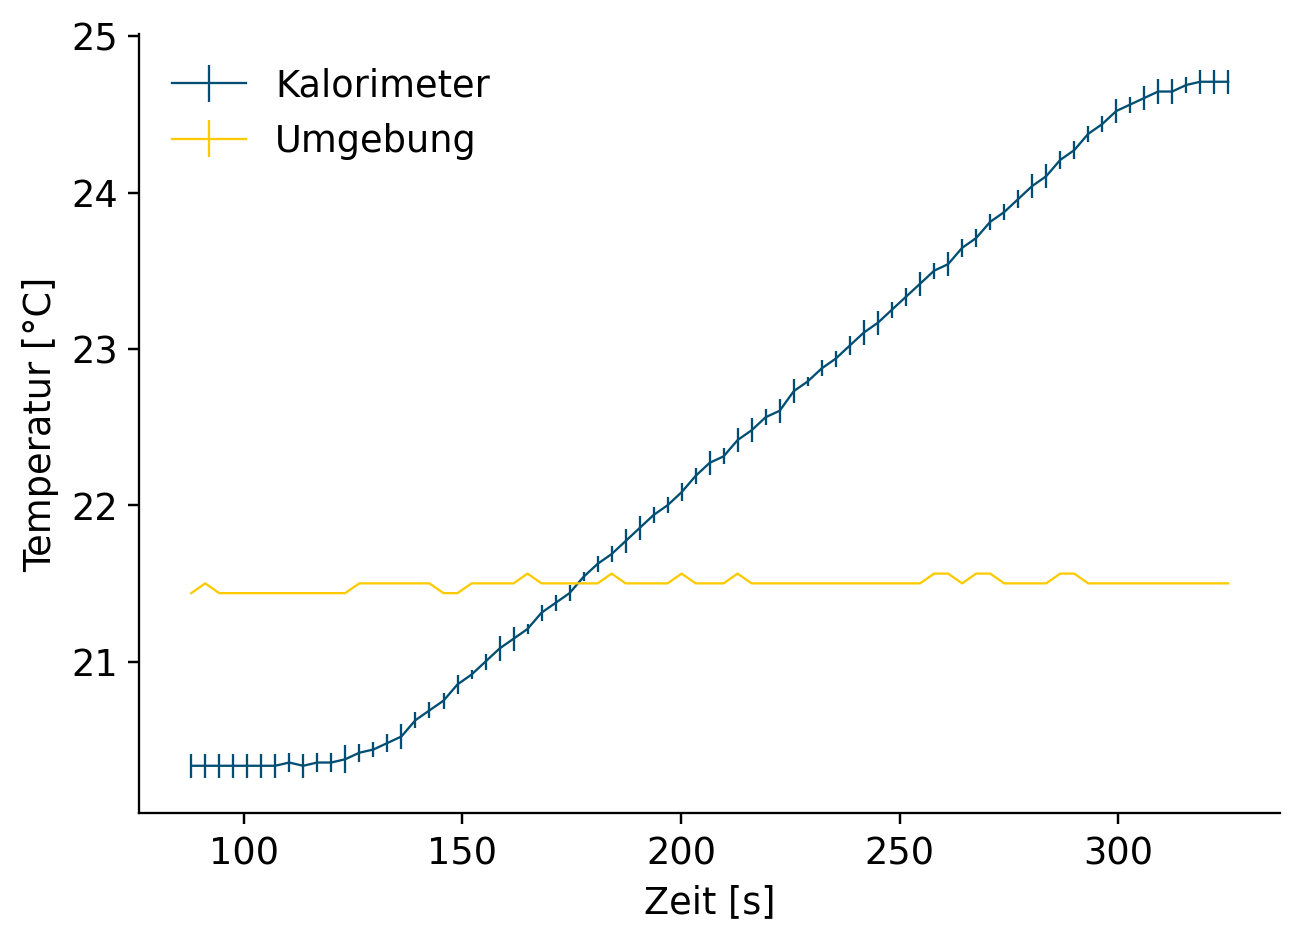

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

list_temp = [mean_std_calorimeter, mean_std_environment]

utility.plot_temp_over_time(list_temp,data_dict["time"][index_calorimeter[0]],["Kalorimeter","Umgebung"],"Zeit [s]","Temperatur [°C]")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = None

#path zur Kalorimeterkonstante festlegen
path_mass = "/home/jovyan/work/calorimetry_laboratory/data/Kalorimeterkonstante"
#Masse mithilfe get_json_entry auslesen
water_mass = m_json.get_json_entry(path_mass, '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass','value'])

# DONE #

In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

current = None
heat_time = None
voltage = None

with h5.File(datafile_path_const) as data:
    current = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["Current"])
    heat_time = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["Heat Time"])
    voltage = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["Voltage"])

    data.close()

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter)

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (current*heat_time*voltage)/(temperature_end - temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
calorimeter_const

1981.1464968152884

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_Stahl/Waermekapazitaet_Stahl.h5"
group_path = "RawData"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 3]
index_bath = [4]
index_env = [2]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_calorimeter[0]],data_dict["temperatures"][index_calorimeter[1]],data_dict["temperatures"][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_bath[0]]])


# DONE #

#### (iii) Daten ploten

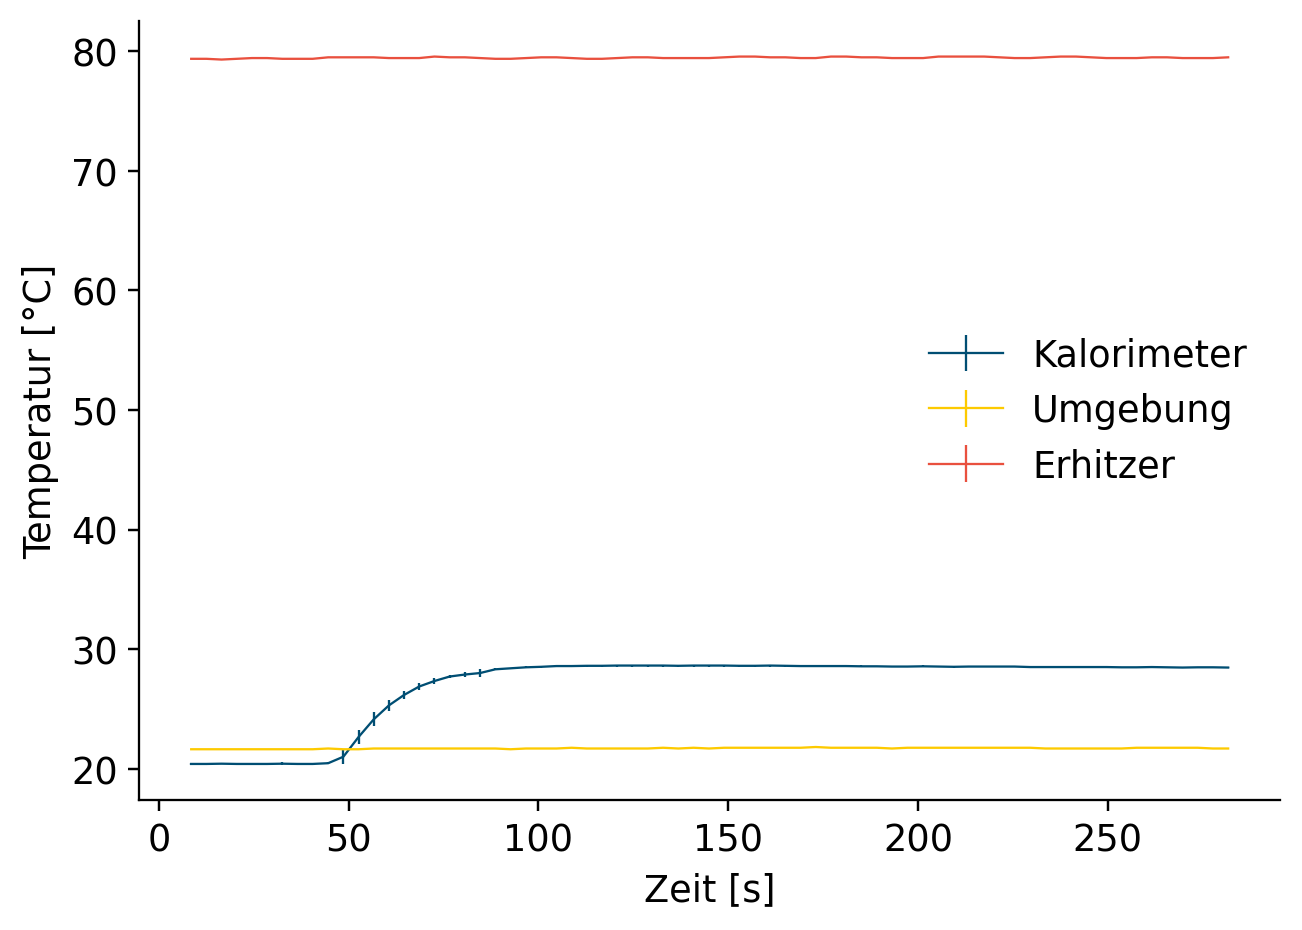

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

list_temp = [mean_std_calorimeter, mean_std_environment, mean_std_heater]

utility.plot_temp_over_time(list_temp,data_dict["time"][index_calorimeter[0]],["Kalorimeter","Umgebung","Erhitzer"],"Zeit [s]","Temperatur [°C]")

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = None

path_mass = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_Stahl"

water_mass = m_json.get_json_entry(path_mass, '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass','value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = None

temperature_start_sample = np.mean(mean_std_heater[0][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = None

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (water_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [21]:
sample_heat_capa

0.796075321492841

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_PA_6_6/Waermekapazitaet_PA_6_6.h5"
group_path = "RawData"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 3]
index_bath = [4]
index_env = [2]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_calorimeter[0]],data_dict["temperatures"][index_calorimeter[1]],data_dict["temperatures"][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_bath[0]]])

# DONE #

#### (iii) Daten ploten

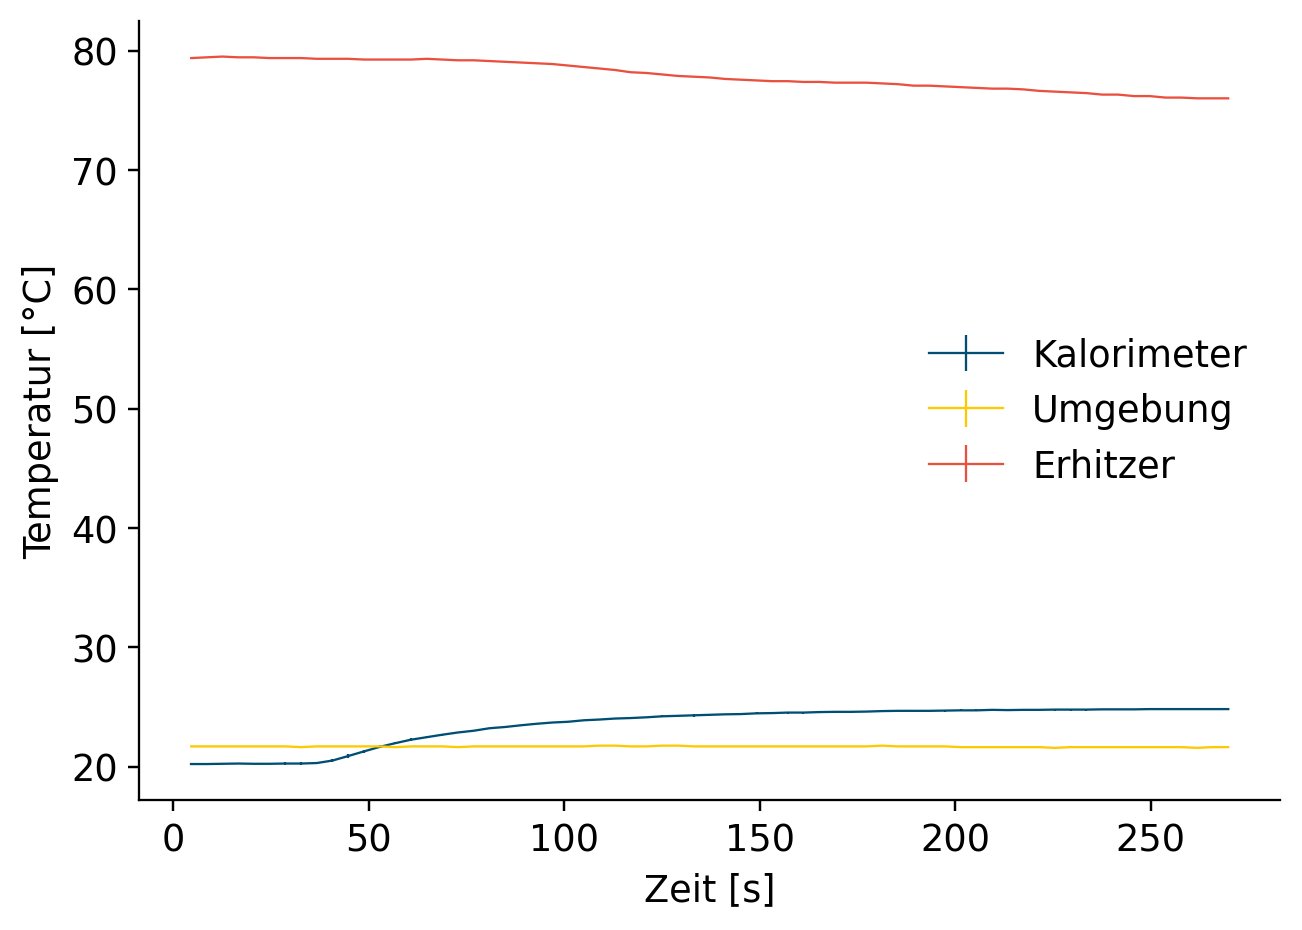

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

list_temp = [mean_std_calorimeter, mean_std_environment, mean_std_heater]

utility.plot_temp_over_time(list_temp,data_dict["time"][index_calorimeter[0]],["Kalorimeter","Umgebung","Erhitzer"],"Zeit [s]","Temperatur [°C]")

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = None

path_mass = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_PA_6_6"

water_mass = m_json.get_json_entry(path_mass, '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass','value'])


# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = None

temperature_start_sample = np.mean(mean_std_heater[0][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = None

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (water_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [31]:
sample_heat_capa

0.4151706093641655

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_Messing/Waermekapazitaet_Messing.h5"
group_path = "RawData"

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 3]
index_bath = [4]
index_env = [2]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_calorimeter[0]],data_dict["temperatures"][index_calorimeter[1]],data_dict["temperatures"][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict["temperatures"][index_bath[0]]])

# DONE #

#### (iii) Daten ploten

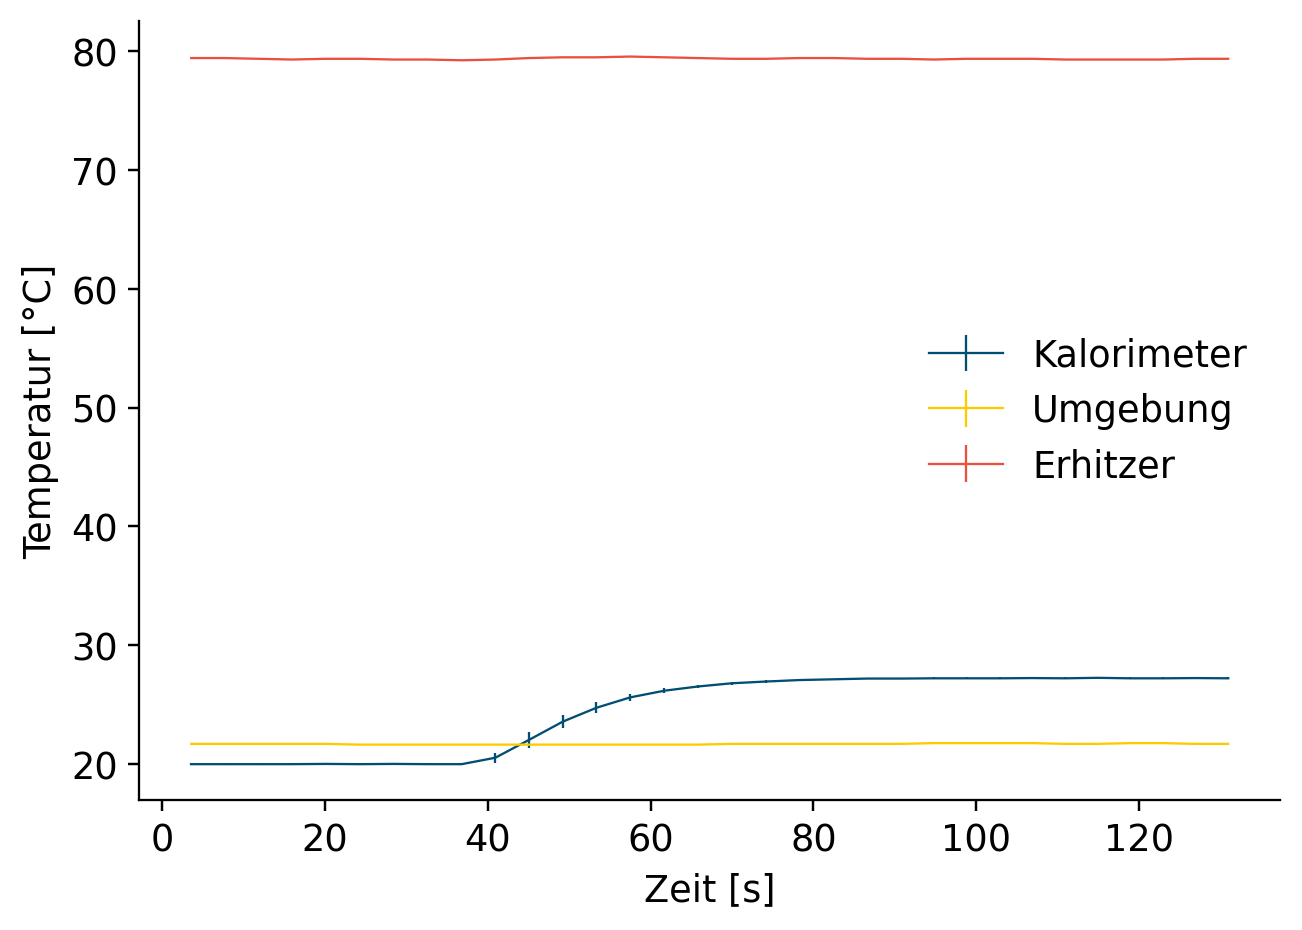

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

list_temp = [mean_std_calorimeter, mean_std_environment, mean_std_heater]

utility.plot_temp_over_time(list_temp,data_dict["time"][index_calorimeter[0]],["Kalorimeter","Umgebung","Erhitzer"],"Zeit [s]","Temperatur [°C]")

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = None

path_mass = "/home/jovyan/work/calorimetry_laboratory/data/Waermekapazitaet_Messing"

water_mass = m_json.get_json_entry(path_mass, '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass','value'])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter) 

# DONE #

In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = None

temperature_start_sample = np.mean(mean_std_heater[0][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const * (temperature_mix - temperature_start_water)) / (water_mass * (temperature_start_sample - temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [41]:
sample_heat_capa

0.6883453896738924

## Diskussion

Zuerst konnte die Kalorimeterkonstante zu 1195.35 J/K berechnet werden. Mit dieser konnten die spezifischen Wärmekapazitäten der einzelnen Proben berechnet werden. Wie erwartet hat sich die höchste spezifische Wärmekapazität für Stahl (c_p_St = 0.48 J/kgK) ergeben, da hier die Temperatur des Wassers am höchsten angestiegen ist. Auch Messing als Metall konnte eine höhere spezifische Wärmekapazität von c_p_Me = 0.415 J/kgK erreichen, jedoch etwas weniger als Stahl. Dass Kunststoffe schlecht Wärme speichern hat sich auch in der spezifische Wärmekapazität für den Kunststoff PA_6_6 wiedergefunden mit einem Wert von: c_p_PA = 0.25 J/kgK. 
Das Wasser, dass mit der Probe ins Kalorimeter gelangt verfälscht das Ergebnis. In unserem Fall war dies aber so wenig Wasser, dass es kaum Auswirkungen hatte. Als weitere Fehlerquelle gibt es den Zeitintervall zwischen Probe aus dem Wasserbad nehmen und ins Kalorimeter legen, da dort auch schon Wärme an die Umgebungsluft abgegeben wurde. PS.: Manchmal kommen andere Werte als Ergebnisse raus, auch, wenn ich nichts geändert habe und ich weiss nicht wie man das beheben kann.

## Fazit
In diesem Experiment konnte ich das erste mal richtig verstehen, woher Konstanten wie die spezifische Wärmekapazität kommen. Durch eigenständiges Experimentieren und Dokumentieren sowie allgemeinen thermodynamischen Zusammenhängen war es uns möglich selber diese Konstanten herzuleiten, die man sonst immer nur gegeben bekommt. Dadurch ist mir ein viel besseres allgemeines Verständnis von Zusammenhängen entstanden. Außerdem konnte ich zum ersten mal ein richtiges Experiment durchführen. Der Umgang mit Daten und Funktionen konnte nach dem Küchentischversuch wieder aufgearbeitet und gefestigt werden.